In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [14]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-eval", dataroot="./data/nuscenes_eval" , verbose=True)

Loading NuScenes tables for version v1.0-eval...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
41 sample,
10177 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.022 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [15]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene_1, Evaluation scene [70-01-01 00:00:06]   20s, eval, #anns:0


{'token': 'f1b25e9d-9553-49ab-b3da-6ee6032faebf', 'name': 'scene_1', 'description': 'Evaluation scene', 'log_token': '3855a7b4-a4c8-4b7a-bd09-c602ed5b5686', 'nbr_samples': 41, 'first_sample_token': '342e8954-bed5-4283-8014-9d53c5fd2871', 'last_sample_token': 'e3d7dff5-b581-46c0-8cf0-88b1c74a9a4f'}
342e8954-bed5-4283-8014-9d53c5fd2871


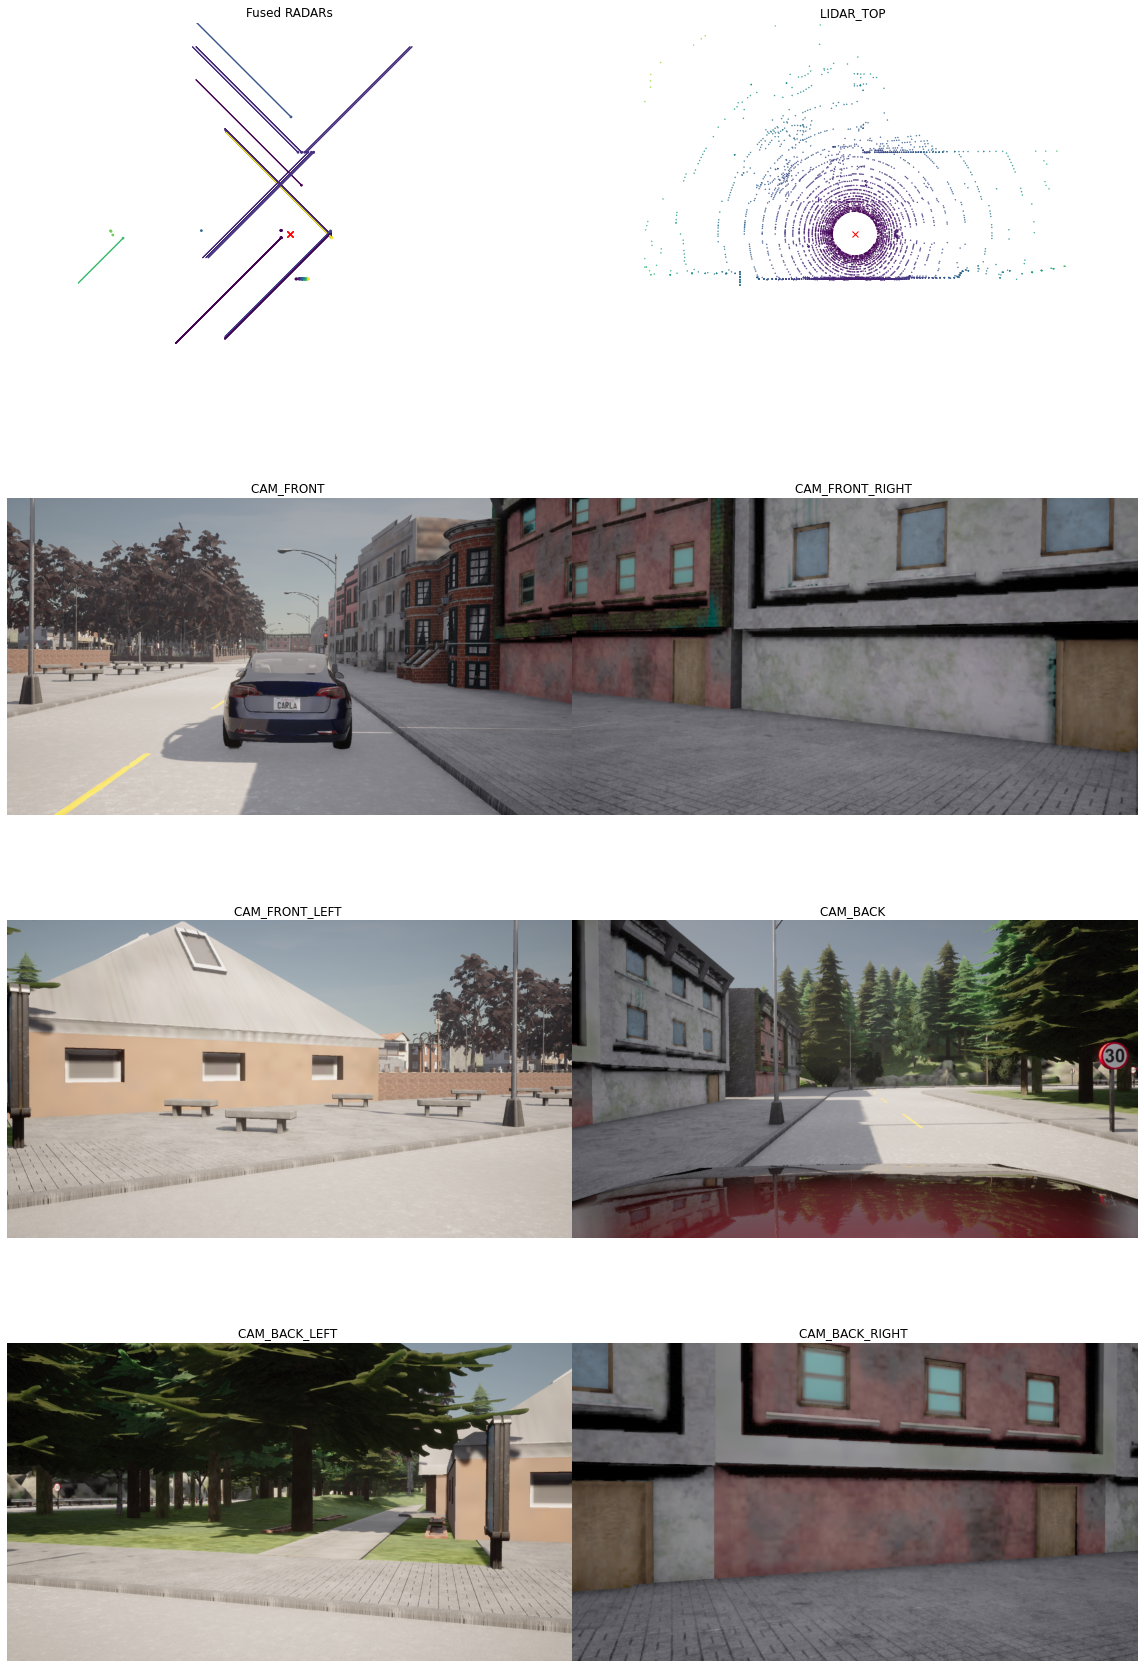

In [16]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)
from nuscenes.utils.data_classes import RadarPointCloud
# RadarPointCloud.disable_filters()   # これで ambig_state や dynprop のフィルタを全部OFF

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [17]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': '342e8954-bed5-4283-8014-9d53c5fd2871', 'scene_token': 'f1b25e9d-9553-49ab-b3da-6ee6032faebf', 'prev': '', 'next': '487bd054-0b9b-49ca-8313-a43097b15084', 'timestamp': 6827688, 'data': {'CAM_FRONT': 'd7cd4c29-3de0-4662-9698-73574f73df93', 'CAM_FRONT_RIGHT': '5cd3f327-ae23-4153-9736-d794dab3a82a', 'CAM_FRONT_LEFT': '83b9a998-a355-4421-912a-4c1590c3c77e', 'CAM_BACK': 'd8934d7e-514f-4ec7-be6e-586685fce93d', 'CAM_BACK_LEFT': 'b4c79ad6-ff40-4808-bf6a-94071342e74f', 'CAM_BACK_RIGHT': '38bc2d61-6cfc-4442-b5fc-65c370550850', 'RADAR_FRONT': 'f5464ab3-fe00-4393-95f1-4837716ca201', 'RADAR_FRONT_LEFT': '0c582af4-e644-4930-baf1-43100f45f0f6', 'RADAR_FRONT_RIGHT': '22a6f8bd-e82f-4b6d-a04e-9b1f601e957a', 'RADAR_BACK_LEFT': '55184a95-1375-4d5b-b623-4751138db8d9', 'RADAR_BACK_RIGHT': '309a8030-61d5-47b8-be4f-892754d6d84f', 'LIDAR_TOP': '4bb7a15e-ded2-4bdc-8304-04153a34a83c'}, 'anns': []}


In [18]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: 342e8954-bed5-4283-8014-9d53c5fd2871

sample_data_token: d7cd4c29-3de0-4662-9698-73574f73df93, mod: camera, channel: CAM_FRONT
sample_data_token: 5cd3f327-ae23-4153-9736-d794dab3a82a, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 83b9a998-a355-4421-912a-4c1590c3c77e, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: d8934d7e-514f-4ec7-be6e-586685fce93d, mod: camera, channel: CAM_BACK
sample_data_token: b4c79ad6-ff40-4808-bf6a-94071342e74f, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: 38bc2d61-6cfc-4442-b5fc-65c370550850, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: f5464ab3-fe00-4393-95f1-4837716ca201, mod: radar, channel: RADAR_FRONT
sample_data_token: 0c582af4-e644-4930-baf1-43100f45f0f6, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 22a6f8bd-e82f-4b6d-a04e-9b1f601e957a, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 55184a95-1375-4d5b-b623-4751138db8d9, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 309a803

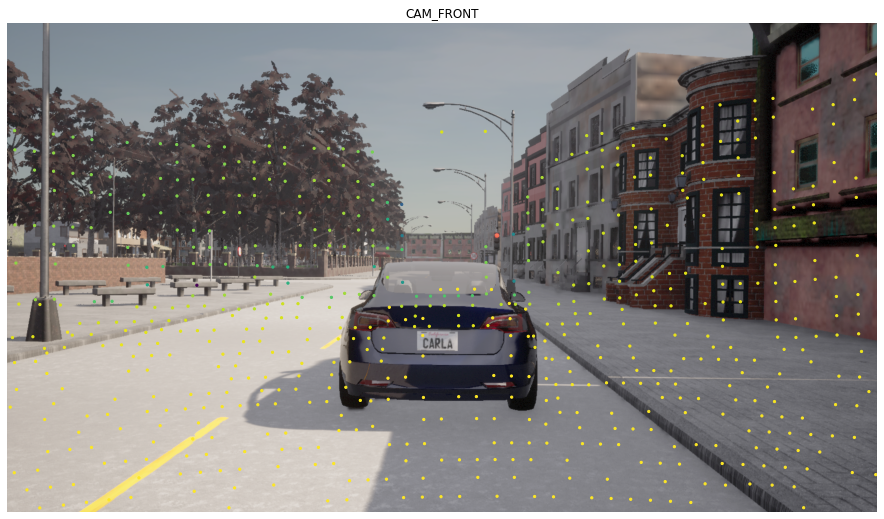

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nusc.explorer.render_pointcloud_in_image(
    my_sample['token'],
    pointsensor_channel='LIDAR_TOP',
    camera_channel='CAM_FRONT',     # 必要なら別CAMに
    render_intensity=True,
    ax=ax                           # ここで渡す
)
plt.show()
